# eda on troll or not in twitter dataset

[source](https://github.com/svmihar/transformers_state_trolls_cch/raw/master/data/train_raw.csv)

This EDA will answer: 
1. how was the word distributed
2. how was each dependent variable (target) distributed
3. most frequent words on each dependent variable

In [1]:
import requests
import pandas as pd
import numpy as np

# load dataset to dataframe

In [2]:
df = pd.read_csv('https://github.com/svmihar/transformers_state_trolls_cch/raw/master/data/train_raw.csv')

## check dataset columns 

In [3]:
print(f'there are {len(df.columns)} columns inside which are: {", ".join(df.columns)}\nhas {len(df)} tweets')

there are 5 columns inside which are: tweetid, user_display_name, tweet_text, clean_text, troll_or_not
has 89948 tweets


In [4]:
print(f'there are {df["troll_or_not"].nunique()} unique classes which are: {df["troll_or_not"].unique()}')

there are 2 unique classes which are: [1 0]


where 
```
1 = troll 
0 = not troll
```

# check on missing values and fill in 

In [5]:
df.isnull().sum().sum()

0

means all the data are there. we can move on. 

# Count word occurrence
all stopwords will be removed. 

In [6]:
from preprocess import remove_stopwords, remove_punctuation

In [7]:
df['clean_text'] = df['clean_text'].apply(remove_punctuation)

In [8]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [9]:
df['clean_text']

0                  tiny true eat hungry someones love love
1                                                      UTC
2                           British Bedene switch Slovenia
3            kalamitykait bearing play Sign Times Enjoy LP
4                                                      CET
                               ...                        
89943      German auto makers largest auto exporters China
89944          park video annoying people hectoring diners
89945    Breaking News House return vote legislation bl...
89946             #NetEase positive #Bilibili content deal
89947    lot polls changed strategies COVID stories ass...
Name: clean_text, Length: 89948, dtype: object

## tweet length

In [10]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

### max, min, standard deviation, 95th percentile

In [11]:
wcount = df['word_count'].values
print(max(wcount), min(wcount), np.std(wcount), np.percentile(wcount, 95))

31 0 2.9565894423080783 11.0


In [12]:
np.mean(wcount)

6.339896384577756

In [13]:
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

In /Users/svmihar/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/svmihar/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/svmihar/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/svmihar/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/svmihar/miniconda/lib/python3.7/site-packa

# class distribution
## word_count, unique_word_count, stop_word_count, mean_word_length, char_count, punctuation_count distribution 

ini pake sns.pairplot aja
bar plot

In [14]:
sizes = [len(df[df['troll_or_not']==1]), len(df[df['troll_or_not']==0])]

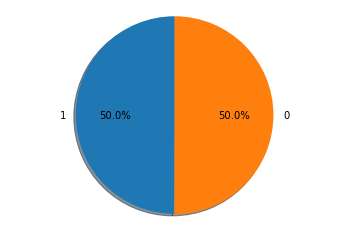

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=[1,0], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
sizes

[44939, 45009]

Text(0.5, 0.98, 'tweet length on each class')

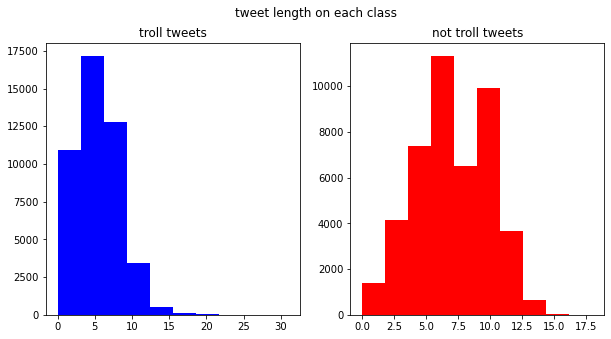

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(df[df['troll_or_not']==1]['word_count'].values, color='blue')
ax1.set_title('troll tweets')

ax2.hist(df[df['troll_or_not']==0]['word_count'].values, color='red')
ax2.set_title('not troll tweets')

fig.suptitle('tweet length on each class')

### average word length in each tweet

In [18]:
df['word_length'] = [len(a) for a in df['clean_text'].values] / df['word_count']

In [19]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'not troll tweets')

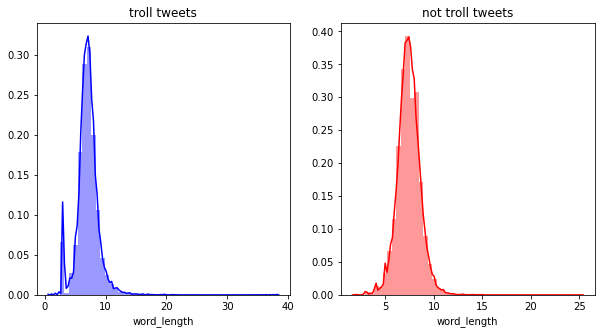

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df[df['troll_or_not']==1]['word_length'], ax=ax1, color='blue')
ax1.set_title('troll tweets')

sns.distplot(df[df['troll_or_not']==0]['word_length'], ax=ax2, color='red')
ax2.set_title('not troll tweets')

### word count
counting the words without the stopwords

In [21]:
from collections import Counter

#### unique word counts

In [22]:
unique_words = set([a for b in df['clean_text'].values for a in b.split()])
len(unique_words )

79079

#### most common words

In [23]:
word_count = Counter([a for b in df['clean_text'] for a in b.split()])
word_count.most_common(10)

[('China', 3285),
 ('Trump', 2851),
 ('#news', 2646),
 ('people', 2370),
 ('Chinese', 2127),
 ('amp', 1656),
 ('Hong', 1579),
 ('time', 1553),
 ('Kong', 1323),
 ('Chinas', 1295)]

<BarContainer object of 10 artists>

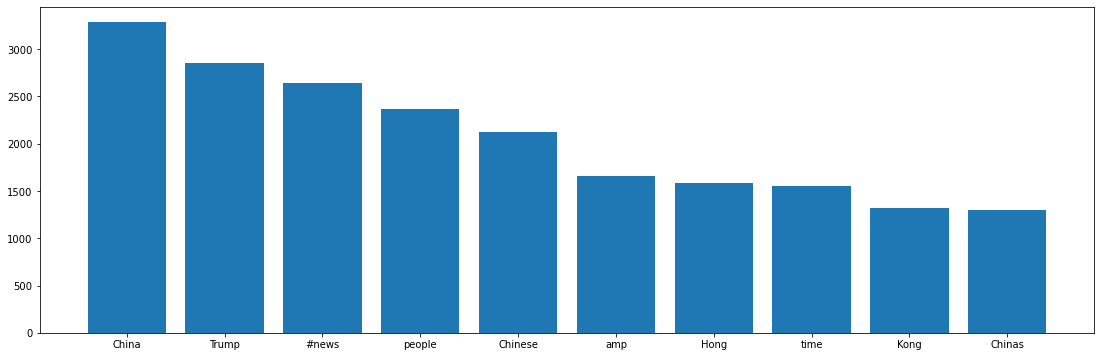

In [24]:
plt.rcParams['figure.figsize'] = (18.9, 6.0)
x,y = zip(*word_count.most_common(10))
plt.bar(x,y)

### word count on troll tweets

<BarContainer object of 10 artists>

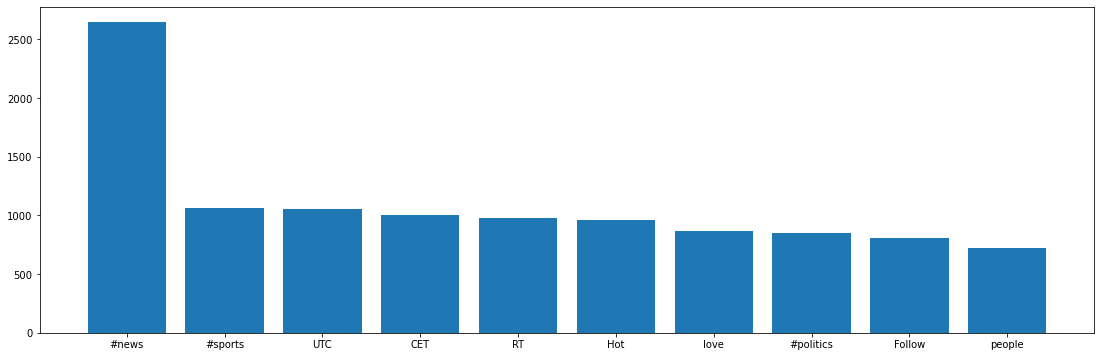

In [25]:
from collections import Counter
word_count = Counter([a for b in df[df['troll_or_not']==1]['clean_text'] for a in b.split()])
word_count.most_common(10)
plt.rcParams['figure.figsize'] = (18.9, 6.0)
x,y = zip(*word_count.most_common(10))
plt.bar(x,y)

### word count on not troll tweets

<BarContainer object of 10 artists>

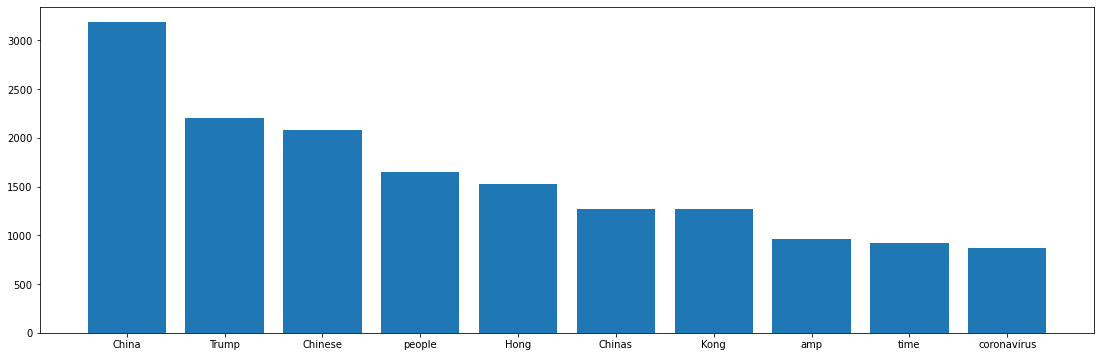

In [26]:
from collections import Counter
word_count = Counter([a for b in df[df['troll_or_not']==0]['clean_text'] for a in b.split()])
word_count.most_common(10)
plt.rcParams['figure.figsize'] = (18.9, 6.0)
x,y = zip(*word_count.most_common(10))
plt.bar(x,y)

# visualizing dataset using tfidf + svd

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
svd = TruncatedSVD(n_components=2)

In [29]:
X = vectorizer.fit_transform(df['clean_text'])

In [30]:
X_array = X.toarray()

In [31]:
X_array.shape

(89256, 431908)

In [32]:
X_svd = svd.fit_transform(X)

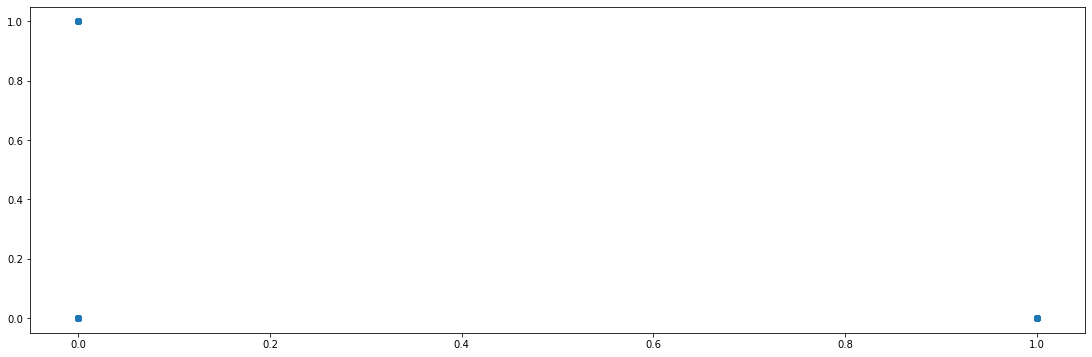

In [33]:
plt.scatter(X_svd[:,0], X_svd[:,1])

here we can see that svd cannot reduce the dimensionality to a sufficient representation, so I'm going to change it to TSNE. 

In [ ]:
from dr import t

t(8000) #due to memory restrictions, my pc can only process 8000 tweets.

In [35]:
import joblib

In [36]:
X_tsne = joblib.load('./dr_results/X_TSNE_8000.pkl')

In [39]:
df_ = pd.read_csv('./sample/sample_8000.csv')

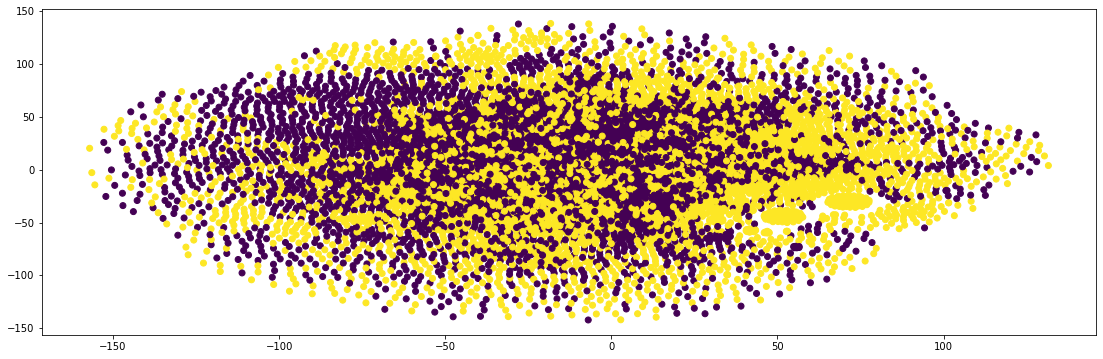

In [40]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = df_['troll_or_not'].values)

as you can see, because of high dimension almost (90000*2), we couldn't diffrentiate much. either we change the dimensionality reduction or use a better embedding for the text.